<a href="https://colab.research.google.com/github/1900690/heatmap_yolo/blob/main/image-heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[参考:https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb](https://github.com/rigvedrs/YOLO-V11-CAM/blob/main/YOLO_v11_EigenCAM.ipynb)

In [1]:
#@title 事前準備
!pip -q install ultralytics
!pip -q install ttach
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

plt.rcParams["figure.figsize"] = [3.0, 3.0]

!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

%cd /content/YOLO-V11-CAM
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.8/914.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultra

In [16]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/datasets"):
  shutil.rmtree("/content/datasets")

#データをアップロード
#uploaded = files.upload()
#file_name = list(uploaded.keys())[0]
file_name ="OK.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

#オブジェクト検出


image 1/1 /content/original/001 (2).jpg: 640x480 1 OK, 1 NG, 63.8ms
Speed: 1.7ms preprocess, 63.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict8

0: 640x640 1 OK, 1 NG, 2059.0ms
Speed: 4.0ms preprocess, 2059.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


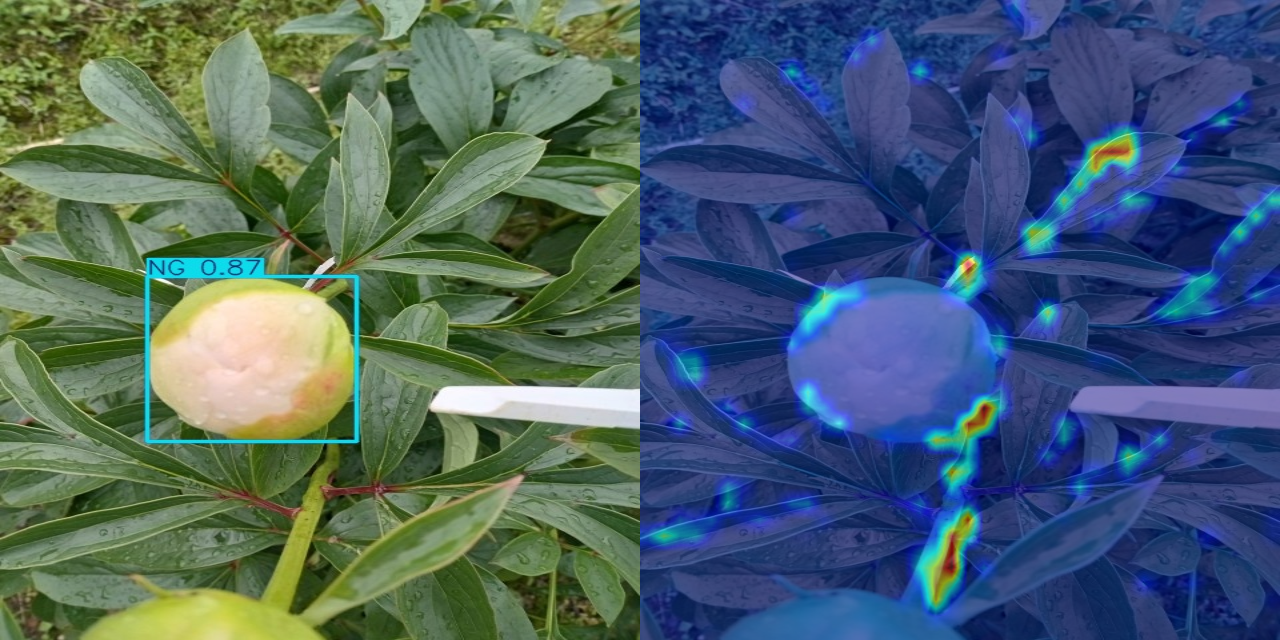

In [ ]:
#判定済みと結合
import glob
import os
from ultralytics import YOLO


model = YOLO("/content/secont-model.pt")
results = model(source="/content/original/", save=True, save_conf=True)


model = YOLO('/content/secont-model.pt')
model = model.cpu()

if os.path.exists("/content/combi2-obj"):
  shutil.rmtree("/content/combi2-obj")
  os.makedirs('/content/combi2-obj')

file_list = sorted(glob.glob('/content/original/*.jpg'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    img2 = cv2.imread('/content/YOLO-V11-CAM/runs/detect/predict/'+os.path.basename(filename))
    img2 = cv2.resize(img2, (640, 640))
    rgb_img2 = img2.copy()
    img2 = np.float32(img2) / 255

    target_layers =[model.model.model[-12]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='od')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
    #comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image=Image.fromarray(np.hstack((im2, cam_image)))
    comb_image.save("/content/combi2-obj/"+os.path.basename(filename))

im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im2, cam_image)))

In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi2-deepper-obj', 'zip', '/content/combi2-obj')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi2-deepper-obj.zip'

#クラス分け

##判定結果と合わせて表示する


image 1/2 /content/original/008 (2)_0.png: 640x640 OK 0.86, NG 0.14, 53.0ms
image 2/2 /content/original/086 (3)_0.png: 640x640 NG 0.99, OK 0.01, 40.3ms
Speed: 10.9ms preprocess, 46.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict8

0: 640x640 OK 0.85, NG 0.15, 1373.7ms
Speed: 6.9ms preprocess, 1373.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 NG 0.99, OK 0.01, 1441.0ms
Speed: 8.1ms preprocess, 1441.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


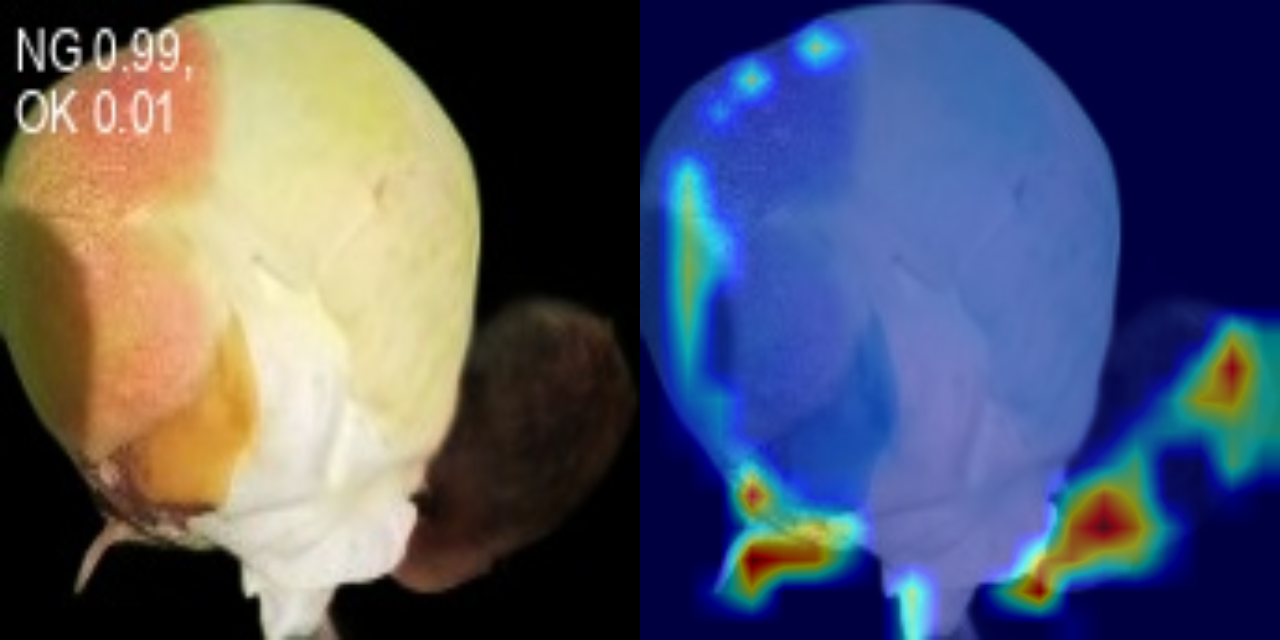

In [19]:
#判定済みと結合
import glob
import os

#判定結果を取得
from ultralytics import YOLO
model = YOLO("/content/model_cls.pt")
results = model(source="/content/original/", save=True, save_conf=True)


model = YOLO('/content/model_cls.pt')
model = model.cpu()

if os.path.exists("/content/combi2-cls"):
  shutil.rmtree("/content/combi2-cls")

os.makedirs('/content/combi2-cls')

file_list = sorted(glob.glob('/content/original/*.png'))

for filename in file_list:
    img = cv2.imread(filename)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    img2 = cv2.imread('/content/YOLO-V11-CAM/runs/classify/predict6/'+os.path.basename(filename)[:-4]+".jpg")
    img2 = cv2.resize(img2, (640, 640))
    rgb_img2 = img2.copy()
    img2 = np.float32(img2) / 255

    target_layers =[model.model.model[-2]]#[model.model.model[-2]]
    cam = EigenCAM(model, target_layers,task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
    #comb_image=Image.fromarray(np.hstack((im, cam_image)))
    comb_image=Image.fromarray(np.hstack((im2, cam_image)))
    comb_image.save("/content/combi2-cls/"+os.path.basename(filename)[:-4]+".jpg")

im2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im2, cam_image)))

In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/combi2-cls', 'zip', '/content/combi2-cls')

#ダウンロード
#files.download("/content/datasets.zip")

'/content/combi2-cls.zip'